In [2]:
# import all the libraries
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#loading the data
features = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','CA','thal','num']
clevelandData = pd.read_csv('cleveland.csv', names = features)
hungaryData = pd.read_csv('hungary.csv', names = features)
switzerlandData = pd.read_csv('switzerland.csv', names = features)

datatemp = [clevelandData, hungaryData, switzerlandData]
data = pd.concat(datatemp)

data = data.drop(['CA','slope','thal'], axis=1)
data = data.replace('?', np.nan)



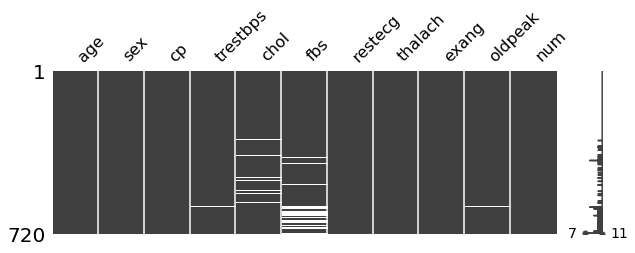

In [4]:
#Missing data detection

msno.matrix(data, figsize=(10,3))



ValueError: Could not interpret input 'heartdisease'

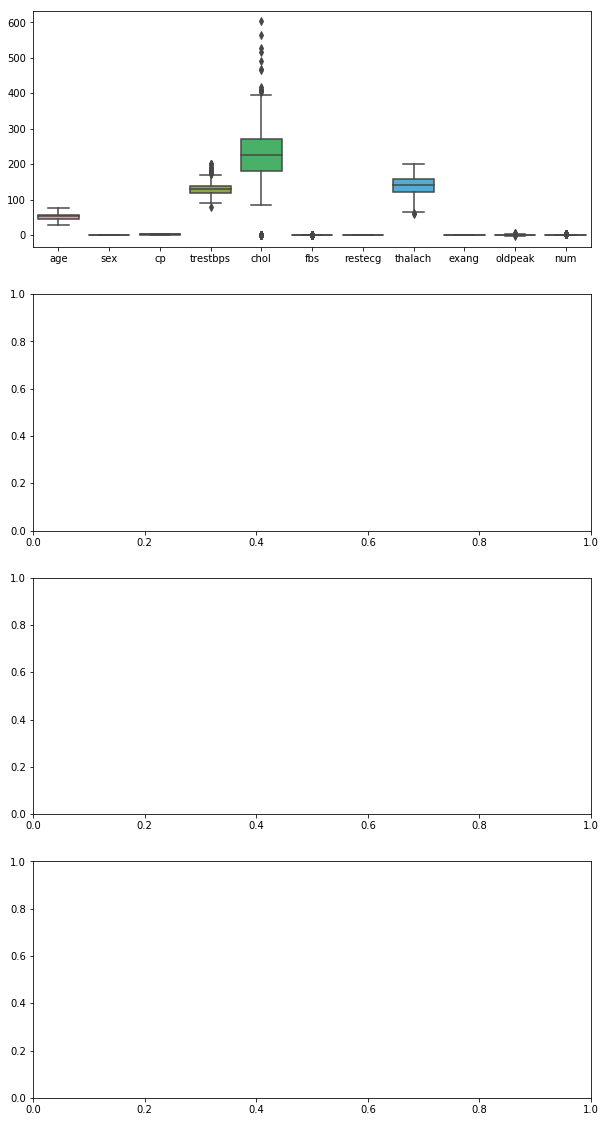

In [7]:
#outliners detection and class imbalance 
fig, axes = plt.subplots(nrows=4,ncols=1)
fig.set_size_inches(10, 20)
sns.boxplot(data=data,orient="v",ax=axes[0])
sns.boxplot(data=data,y="heartdisease",orient="v",ax=axes[1])
sns.boxplot(data=data,y="heartdisease",x="age",orient="v",ax=axes[2])
sns.boxplot(data=data,y="heartdisease",x="sex",orient="v",ax=axes[3])




NameError: name 'sn' is not defined

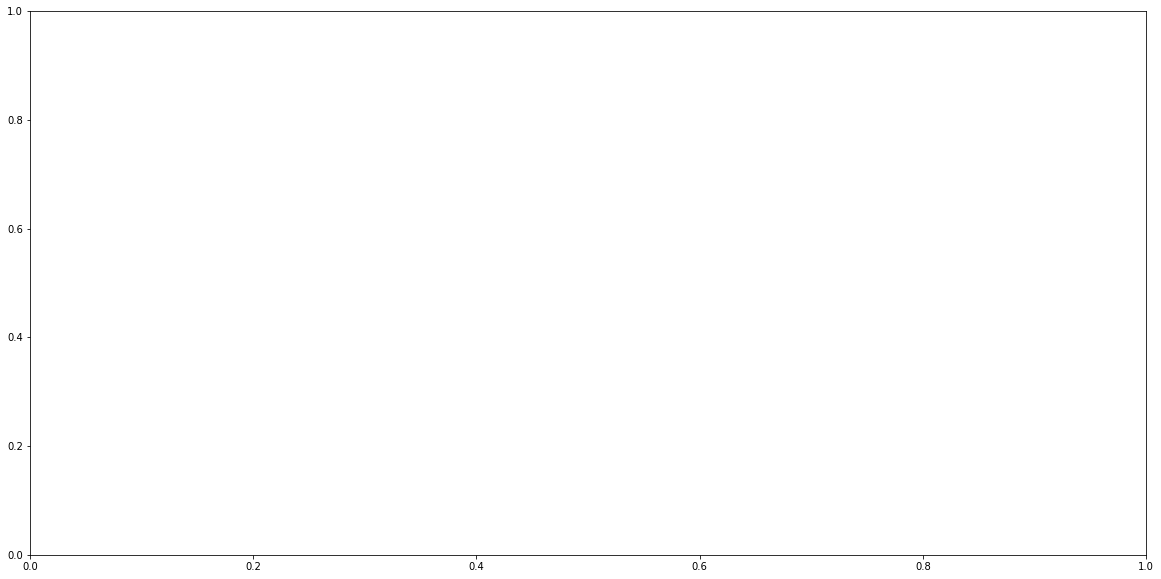

In [8]:
# Correlation analasys
corrMatt = data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)


In [10]:
from sklearn.preprocessing import normalize, Imputer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [11]:
# Preprocessing the data
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imputedData = imp.fit_transform(data)

In [12]:
# Creating Test and Train data
X_train, X_test, y_train, y_test = train_test_split(imputedData[:, :-1], imputedData[:, -1], test_size=0.3, random_state=42)


In [13]:
# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Build and train the Model
classifier = svm.SVC(kernel='rbf')
classifier.fit(X_train, y_train)
preds = classifier.predict(X_test)


In [15]:
# Accuracy of predictions
accuracy_score(y_test, preds)

0.6527777777777778